In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datata/validation_data_to_be_shared.csv
/kaggle/input/train-data/Dev_data_to_be_shared.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")


In [9]:
train = pd.read_csv('/kaggle/input/train-data/Dev_data_to_be_shared.csv')

In [10]:
train.head(10)

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,0,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,0,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0,47000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,0,105000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
9,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train.shape

(96806, 1216)

In [34]:
train.describe().style.set_properties(**{
    "background-color": "aqua", 
    "color": "#000000", 
    "border": "1.5px solid #5f0d11"
})

In [8]:
train.isnull().sum()

account_number                 0
bad_flag                       0
onus_attribute_1           25231
transaction_attribute_1    25231
transaction_attribute_2    25231
                           ...  
onus_attribute_44          85196
onus_attribute_45          85196
onus_attribute_46          85196
onus_attribute_47          85196
onus_attribute_48          85196
Length: 1216, dtype: int64

In [9]:
train.duplicated().sum()

0

In [11]:
#no blank row with all missing column

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

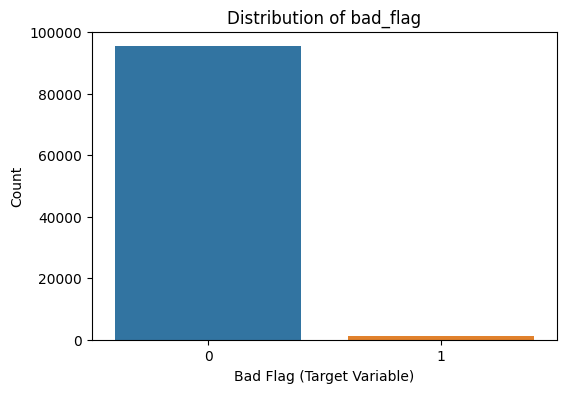

In [15]:
# Plotting the distribution of the target variable 'bad_flag'
plt.figure(figsize=(6, 4))
sns.countplot(x='bad_flag', data=train)
plt.title('Distribution of bad_flag')
plt.xlabel('Bad Flag (Target Variable)')
plt.ylabel('Count')
plt.show()

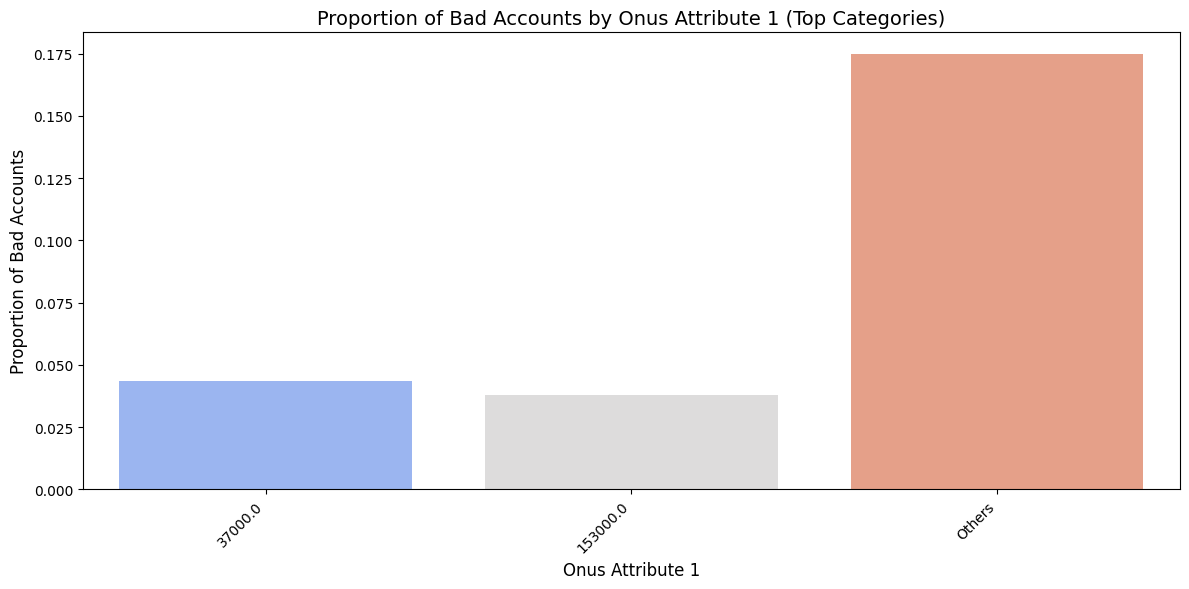

In [16]:
# Group by onus_attribute_1 and calculate the mean and count for bad_flag
grouped = train.groupby('onus_attribute_1')['bad_flag'].mean().reset_index()
grouped['count'] = train.groupby('onus_attribute_1')['bad_flag'].count().values

# Option 1: Sort by proportion of bad accounts and select top N categories
top_n = 20  # Change this value as needed
grouped = grouped.sort_values(by='bad_flag', ascending=False).head(top_n)

# Option 2: Aggregate smaller categories into "Others"
threshold = 100  # Minimum number of records to avoid grouping as "Others"
grouped['onus_attribute_1'] = grouped['onus_attribute_1'].where(grouped['count'] >= threshold, 'Others')
grouped = grouped.groupby('onus_attribute_1', as_index=False).mean()

# Bar plot for grouped data
plt.figure(figsize=(12, 6))
sns.barplot(x='onus_attribute_1', y='bad_flag', data=grouped, palette='coolwarm')
plt.title('Proportion of Bad Accounts by Onus Attribute 1 (Top Categories)', fontsize=14)
plt.xlabel('Onus Attribute 1', fontsize=12)
plt.ylabel('Proportion of Bad Accounts', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()
plt.show()


Categories with fewer records (less than the threshold value of 100) are grouped into an "Others" category. 

The "Others" category exhibits the highest proportion of bad accounts, suggesting that aggregating smaller categories might mask specific high-risk patterns. Meanwhile, distinct categories like 37000.0 and 153000.0 have comparatively lower bad account proportions, possibly indicating more stable or well-monitored segments.

In [11]:
# Check the imbalance
bad_flag_counts = train['bad_flag'].value_counts()
print("Target Variable Counts:\n", bad_flag_counts)
print("\nBad Flag Proportion:", bad_flag_counts[1] / sum(bad_flag_counts))

Target Variable Counts:
 bad_flag
0    95434
1     1372
Name: count, dtype: int64

Bad Flag Proportion: 0.01417267524740202


Missing Values Percentage:
 bureau_436           100.000000
bureau_447           100.000000
bureau_449            94.124331
bureau_148            93.552053
bureau_448            90.028511
                        ...    
bureau_187             1.232362
onus_attribute_16      0.002066
onus_attribute_13      0.002066
onus_attribute_5       0.002066
onus_attribute_10      0.002066
Length: 1185, dtype: float64


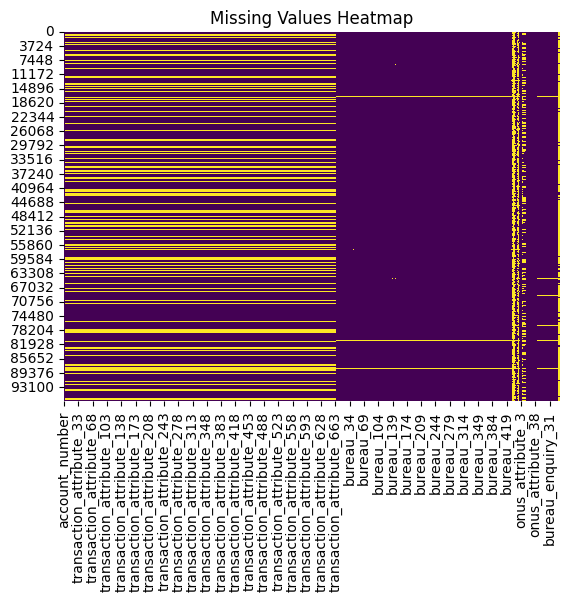

In [17]:
missing_values = train.isna().sum()
missing_percentage = (missing_values / train.shape[0]) * 100
print("Missing Values Percentage:\n", missing_percentage[missing_percentage > 0].sort_values(ascending=False))

# Visualize missing values
sns.heatmap(train.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [5]:
# Drop columns with 100% missing values
missing_percentage = train.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage == 100].index
train.drop(columns=columns_to_drop, axis=1, inplace=True)

In [7]:
from sklearn.impute import SimpleImputer

In [23]:
train.shape

(96806, 1214)

# handling missing value

In [8]:
# Identify numeric columns
numeric_cols = train.select_dtypes(include=[np.number]).columns

# Apply imputer for numeric columns
numeric_imputer = SimpleImputer(strategy='median')  # You can change the strategy if needed

# Apply the imputer to the numeric columns and align with original dataset
numeric_imputed = pd.DataFrame(
    numeric_imputer.fit_transform(train[numeric_cols]),
    columns=numeric_cols,
    index=train.index
)

# Combine the imputed numeric data back into the original DataFrame
train = pd.concat([numeric_imputed], axis=1)

# Save the cleaned dataset (optional)
train.to_csv('data_cleaned.csv', index=False)

# Verify the result
print("Missing values handled successfully!")
print(train.isnull().sum())  # Should show 0 for all columns


Missing values handled successfully!
account_number             0
bad_flag                   0
onus_attribute_1           0
transaction_attribute_1    0
transaction_attribute_2    0
                          ..
onus_attribute_44          0
onus_attribute_45          0
onus_attribute_46          0
onus_attribute_47          0
onus_attribute_48          0
Length: 1214, dtype: int64


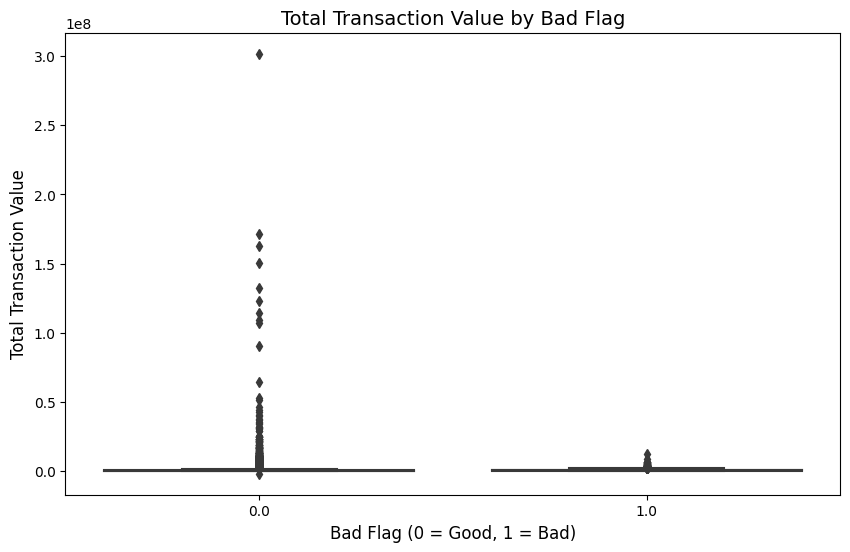

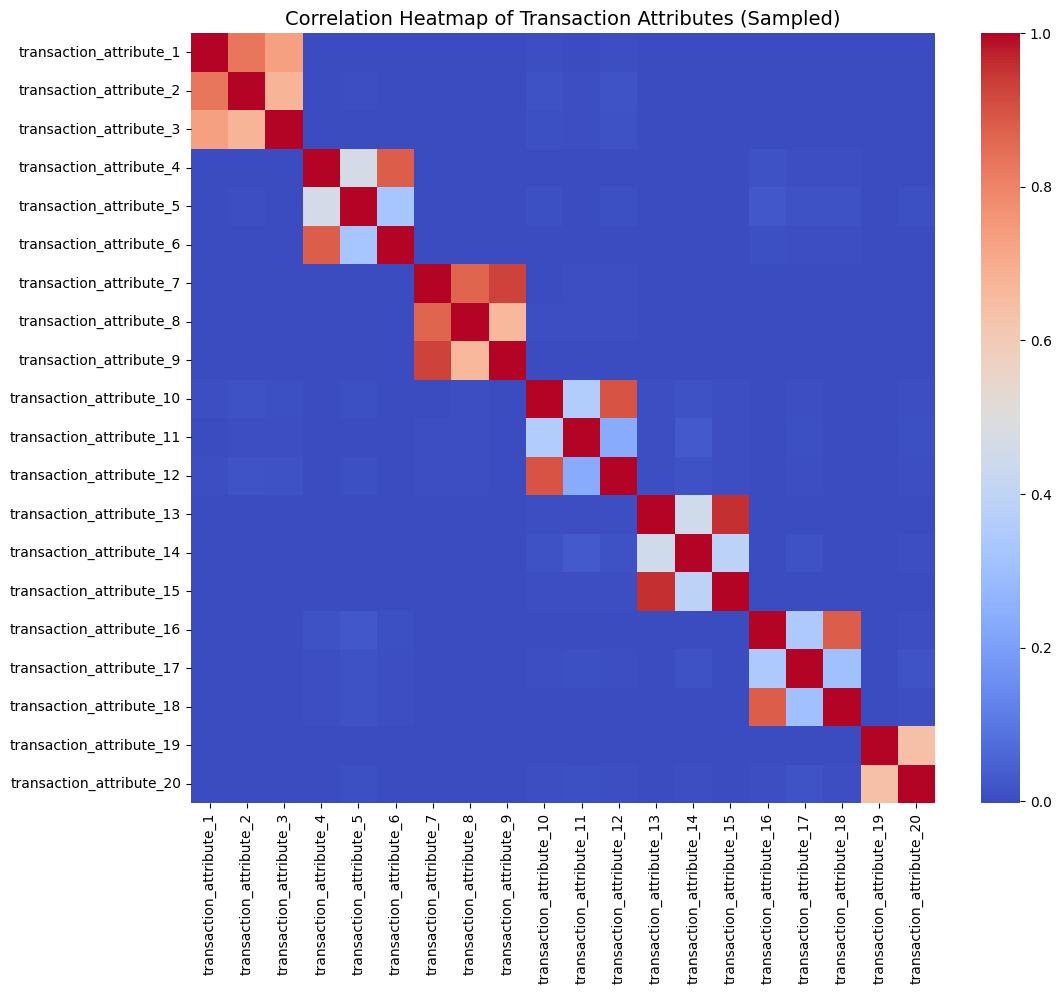

In [28]:
# Identify transaction attribute columns
transaction_cols = [col for col in train.columns if col.startswith('transaction_attribute_')]

# 1. Compute aggregate metrics for transaction attributes
train['transaction_total'] = train[transaction_cols].sum(axis=1)  # Total transaction value
train['transaction_mean'] = train[transaction_cols].mean(axis=1)  # Mean transaction value
train['transaction_std'] = train[transaction_cols].std(axis=1)    # Std deviation of transaction values

# 2. Boxplots for aggregated metrics by `bad_flag`
plt.figure(figsize=(10, 6))
sns.boxplot(x='bad_flag', y='transaction_total', data=train, palette='viridis')
plt.title('Total Transaction Value by Bad Flag', fontsize=14)
plt.xlabel('Bad Flag (0 = Good, 1 = Bad)', fontsize=12)
plt.ylabel('Total Transaction Value', fontsize=12)
plt.show()

# 3. Correlation Heatmap (Sampled/Reduced Columns)
# Calculate correlation matrix for a random sample of transaction attributes (to avoid memory issues)
sampled_cols = transaction_cols[:20]  # Select the first 20 transaction columns (or use random.sample)
correlation_matrix = train[sampled_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Transaction Attributes (Sampled)', fontsize=14)
plt.show()


The chart shows that bad accounts (1.0) typically have lower total transaction values, indicating that fraudulent activities are more concentrated in small-value transactions. 

Non-bad accounts (0.0) exhibit a wider range of transaction values, including some extreme outliers with very high transaction values.

This suggests that fraudulent accounts may deliberately avoid high-value transactions to evade detection, while high-value transactions in non-bad accounts might require additional scrutiny for potential misclassification or undetected fraud.

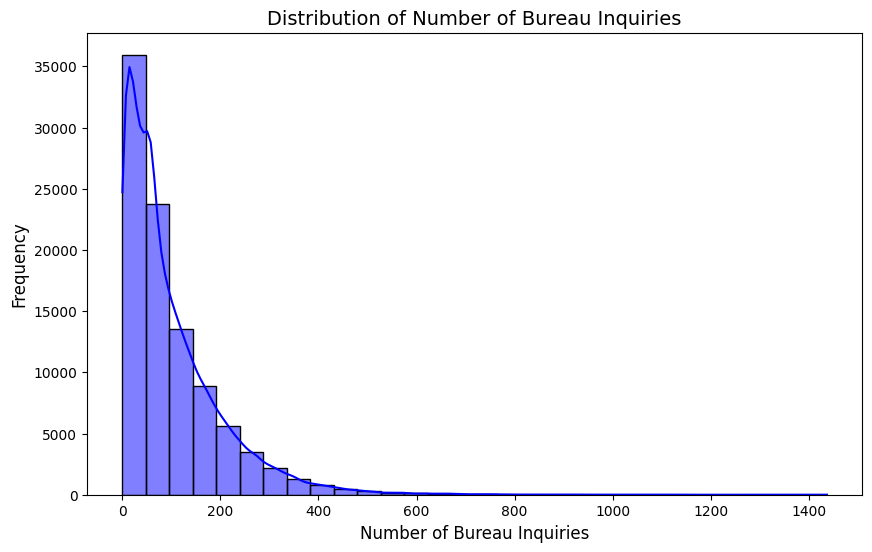

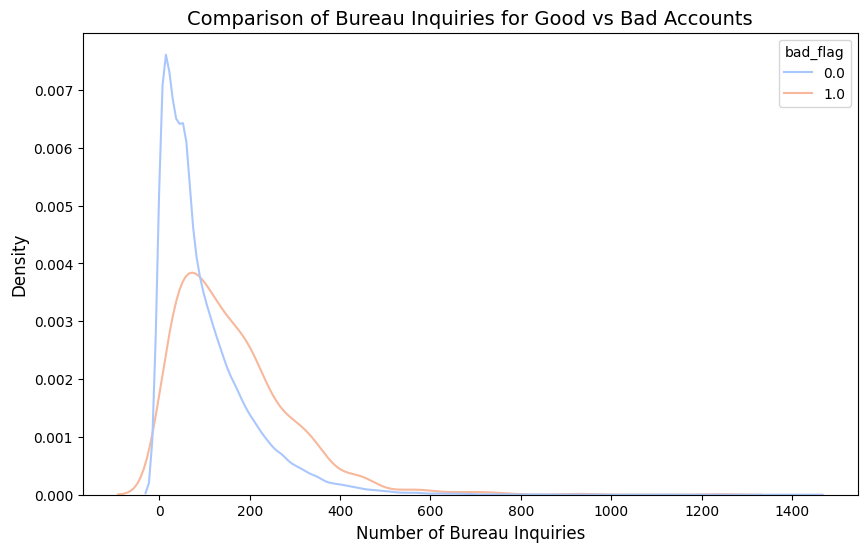

In [41]:
# Identify bureau enquiry columns
bureau_enquiry_cols = [col for col in train.columns if col.startswith('bureau_enquiry_')]

# 1. Count the number of bureau inquiries per account (sum of bureau_enquiry_* columns)
train['bureau_enquiry_count'] = train[bureau_enquiry_cols].sum(axis=1)

# 2. Histogram or KDE plot of the number of inquiries
plt.figure(figsize=(10, 6))
sns.histplot(train['bureau_enquiry_count'], kde=True, color='blue', bins=30)
plt.title('Distribution of Number of Bureau Inquiries', fontsize=14)
plt.xlabel('Number of Bureau Inquiries', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 3. Compare number of inquiries for bad (bad_flag=1) vs good (bad_flag=0) accounts
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train, x='bureau_enquiry_count', hue='bad_flag', common_norm=False, palette='coolwarm')
plt.title('Comparison of Bureau Inquiries for Good vs Bad Accounts', fontsize=14)
plt.xlabel('Number of Bureau Inquiries', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()


Accounts with extremely high numbers of inquiries could signal heightened credit activity, potential fraud, or accounts under close monitoring.


The long tail indicates that while high-inquiry accounts are rare, they might warrant additional scrutiny as outliers could be associated with unique risk factors.


The concentration of accounts at low inquiry counts may suggest a stable population with minimal credit bureau interaction.


Bad accounts tend to have a higher number of bureau inquiries compared to good accounts, with a noticeable separation in the higher inquiry range.

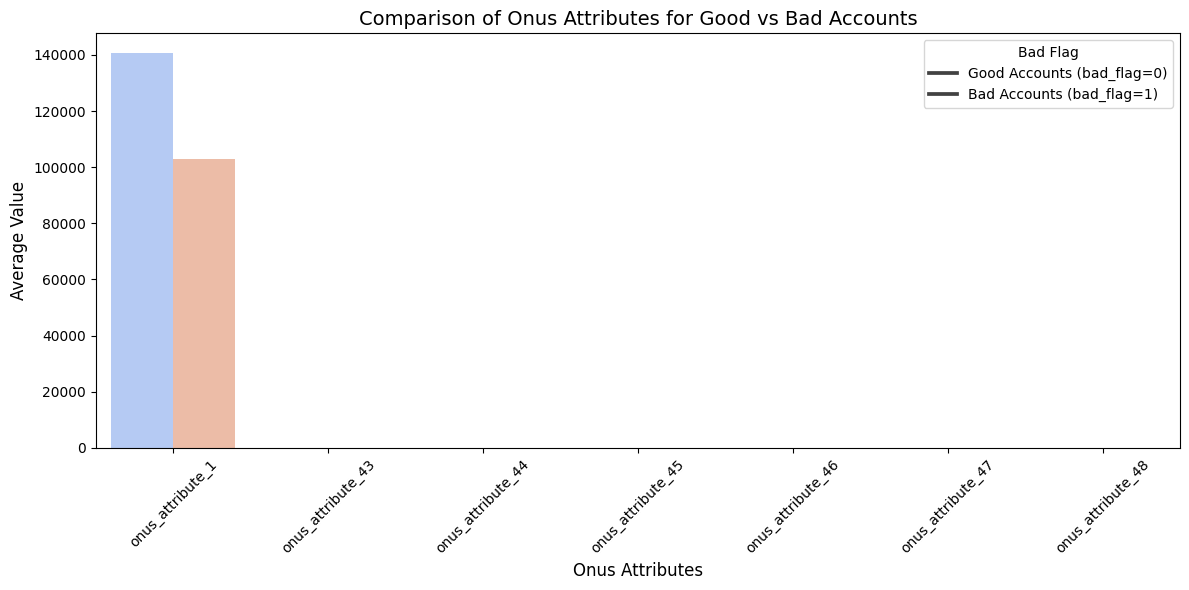

In [30]:
# List of onus attribute columns to consider
onus_attribute_cols = ['onus_attribute_1'] + [f'onus_attribute_{i}' for i in range(43, 49)]

# 1. Group by bad_flag and calculate the average values for the selected onus attributes
grouped_onus = train[onus_attribute_cols + ['bad_flag']].groupby('bad_flag').mean().reset_index()

# 2. Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_onus.melt(id_vars='bad_flag', value_vars=onus_attribute_cols), 
            x='variable', y='value', hue='bad_flag', palette='coolwarm')

plt.title('Comparison of Onus Attributes for Good vs Bad Accounts', fontsize=14)
plt.xlabel('Onus Attributes', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Bad Flag', labels=['Good Accounts (bad_flag=0)', 'Bad Accounts (bad_flag=1)'])
plt.tight_layout()
plt.show()

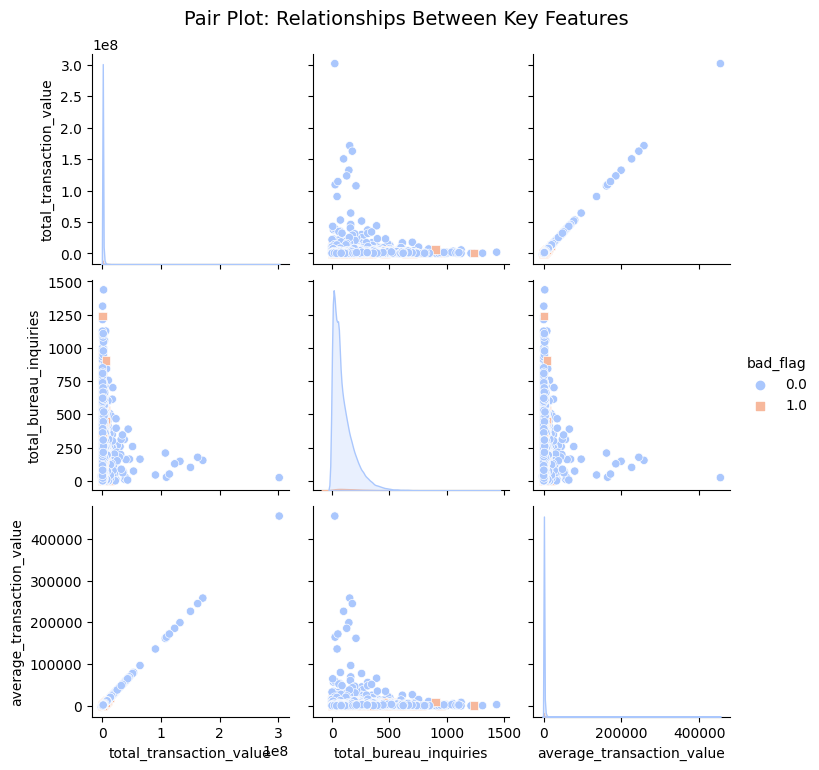

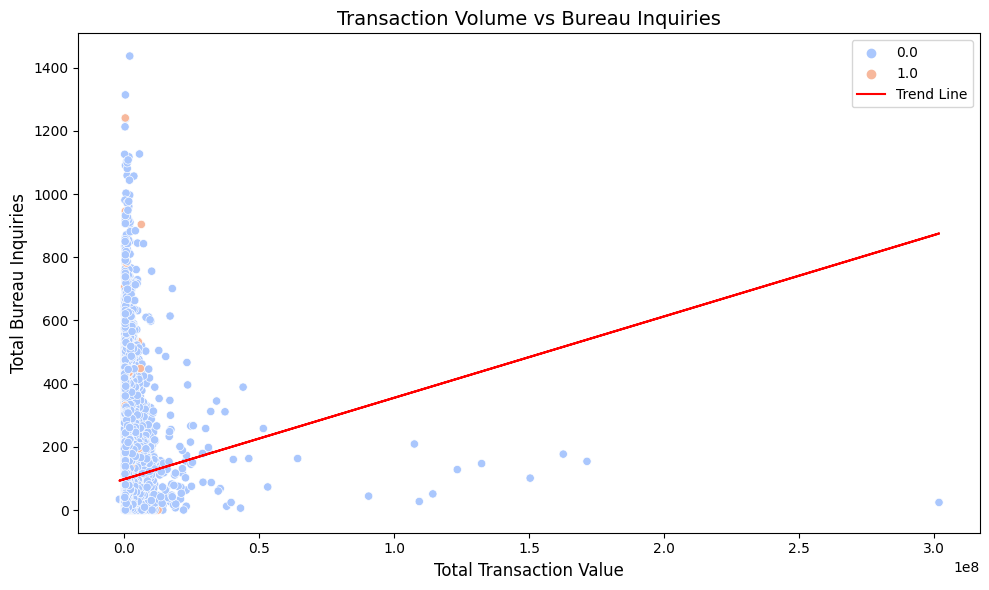

In [38]:
from scipy.stats import linregress
# 1. Aggregated Metrics for Transaction Attributes and Bureau Inquiries

# Identify transaction attributes and bureau enquiry columns
transaction_cols = [col for col in train.columns if col.startswith('transaction_attribute_')]
bureau_cols = [col for col in train.columns if col.startswith('bureau_enquiry_')]

# Calculate aggregated metrics: Total transaction volume and Total inquiries
train['total_transaction_value'] = train[transaction_cols].sum(axis=1)
train['total_bureau_inquiries'] = train[bureau_cols].sum(axis=1)

# Calculate average transaction value
train['average_transaction_value'] = train['total_transaction_value'] / len(transaction_cols)

# 2. Pair Plot for Selected Features
# For pair plot, select a subset of columns to avoid overloading the plot
selected_cols = ['total_transaction_value', 'total_bureau_inquiries', 'average_transaction_value', 'bad_flag']

# Create a pairplot to explore the relationships between the selected features
sns.pairplot(train[selected_cols], hue='bad_flag', palette='coolwarm', markers=["o", "s"])
plt.suptitle('Pair Plot: Relationships Between Key Features', y=1.02, fontsize=14)
plt.show()

# 3. Scatter Plot with Trend Line for Transaction Volume vs Bureau Inquiries
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_transaction_value', y='total_bureau_inquiries', data=train, hue='bad_flag', palette='coolwarm', marker='o')

# Add a linear trend line
slope, intercept, r_value, p_value, std_err = linregress(train['total_transaction_value'], train['total_bureau_inquiries'])
plt.plot(train['total_transaction_value'], slope * train['total_transaction_value'] + intercept, color='red', label='Trend Line')

plt.title('Transaction Volume vs Bureau Inquiries', fontsize=14)
plt.xlabel('Total Transaction Value', fontsize=12)
plt.ylabel('Total Bureau Inquiries', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


Total Transaction Value vs. Average Transaction Value:

There is a strong linear correlation between total transaction value and average transaction value, as expected.
Bad accounts (orange) are scattered along the trend but seem more concentrated in certain ranges compared to good accounts.


Total Bureau Inquiries vs. Total Transaction Value:

Accounts with a high number of bureau inquiries generally have lower total transaction values.
Bad accounts (orange) tend to have a slightly higher number of bureau inquiries compared to good accounts (blue).


Average Transaction Value vs. Total Bureau Inquiries:

There is an inverse relationship; accounts with high bureau inquiries tend to have lower average transaction values.
Bad accounts are slightly more prevalent in the high-inquiry, low-transaction-value range.


Density Plot:

The marginal plots highlight that good accounts dominate the lower ranges of all features, while bad accounts are more dispersed, especially in bureau inquiries.

Higher total bureau inquiries are weakly associated with higher total transaction values. However, bad accounts tend to cluster around higher bureau inquiries, indicating that frequent inquiries might be a risk signal for account performance.



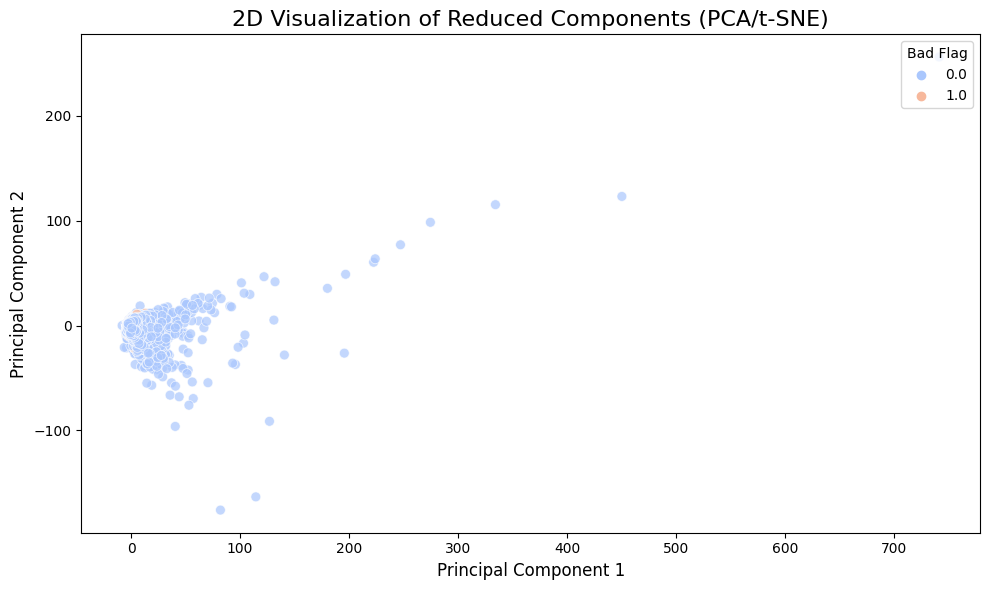

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is loaded into a DataFrame called 'train'

# 1. Identify the relevant columns (transaction and bureau enquiry)
transaction_cols = [col for col in train.columns if col.startswith('transaction_attribute_')]
bureau_cols = [col for col in train.columns if col.startswith('bureau_enquiry_')]

# Combine the relevant columns for dimensionality reduction
features = train[transaction_cols + bureau_cols]

# 2. Standardize the data (scaling to have mean=0, std=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for 2D visualization
pca_components = pca.fit_transform(scaled_features)

# Add PCA components to the dataframe
train['pca_1'] = pca_components[:, 0]
train['pca_2'] = pca_components[:, 1]


# Visualize the reduced components (PCA or t-SNE)
plt.figure(figsize=(10, 6))

# 2D scatter plot of PCA components
sns.scatterplot(x='pca_1', y='pca_2', data=train, hue='bad_flag', palette='coolwarm', s=50, alpha=0.7, marker='o')

plt.title('2D Visualization of Reduced Components (PCA/t-SNE)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Bad Flag', loc='upper right')
plt.tight_layout()
plt.show()


Cluster Formation:

The majority of the data points (both good and bad accounts) are concentrated in a dense cluster near the origin of the principal component axes.

Separation of Bad Accounts:

While bad accounts (orange) are present within the dense cluster, they do not exhibit a clearly distinct grouping from good accounts (blue). This suggests potential overlap between the features of good and bad accounts in the reduced dimensionality space.

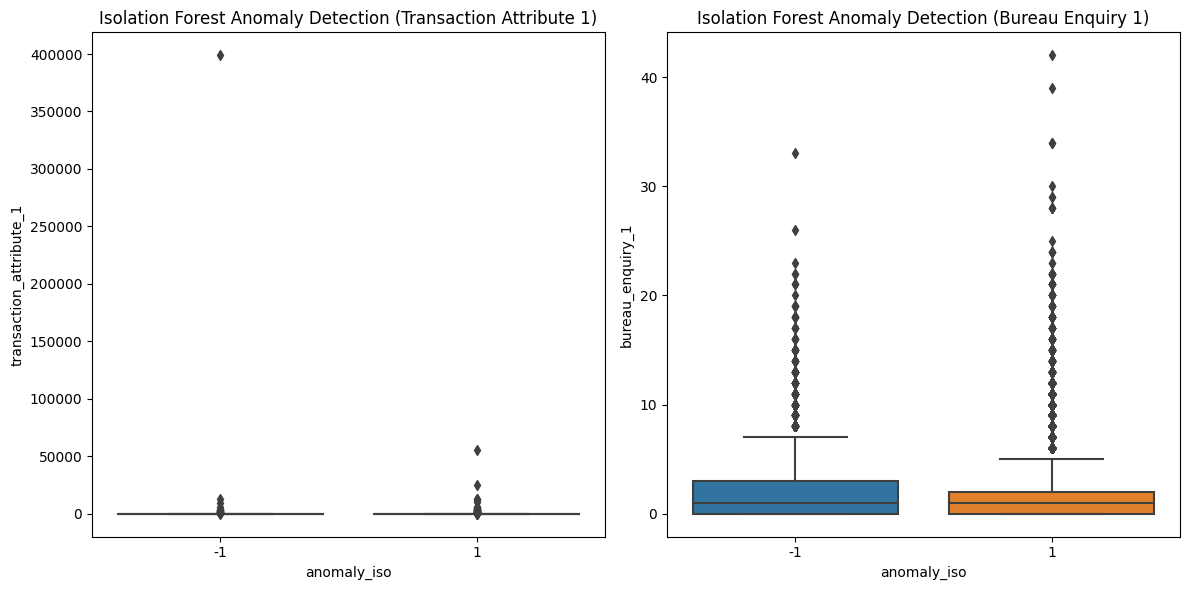

In [11]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

transaction_columns = [f'transaction_attribute_{i}' for i in range(1, 664)]  # Adjust column names accordingly
bureau_columns = [f'bureau_enquiry_{i}' for i in range(1, 51)]  # Adjust column names accordingly

# Combine relevant columns into a new DataFrame
features = train[transaction_columns + bureau_columns]

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
train['anomaly_iso'] = iso_forest.fit_predict(features)

# Plot anomalies using boxplot for a transaction attribute and bureau enquiry attribute (e.g., transaction_attribute_1)
plt.figure(figsize=(12, 6))

# Boxplot for transaction_attribute_1
plt.subplot(1, 2, 1)
sns.boxplot(x=train['anomaly_iso'], y=train['transaction_attribute_1'])
plt.title('Isolation Forest Anomaly Detection (Transaction Attribute 1)')

# Boxplot for bureau_enquiry_1
plt.subplot(1, 2, 2)
sns.boxplot(x=train['anomaly_iso'], y=train['bureau_enquiry_1'])
plt.title('Isolation Forest Anomaly Detection (Bureau Enquiry 1)')

plt.tight_layout()
plt.show()


Anomalies in Transaction Attribute:

The Isolation Forest model identified extreme outliers (anomalies) with very high transaction values.

Most data points are concentrated near the lower transaction values, suggesting the majority of transactions fall within a normal range.


Anomalies in Bureau Enquiry:

The boxplot reveals several outliers with higher bureau enquiry counts.

The majority of the data points fall within a compact range near the lower end of the scale.
Anomalous vs Normal Data:


Data labeled as anomalies (represented by 1) consistently exhibit larger values compared to non-anomalous data (-1), indicating that the Isolation Forest successfully flags unusual patterns.


In [23]:
# Univariate Analysis (Single Variable Analysis)

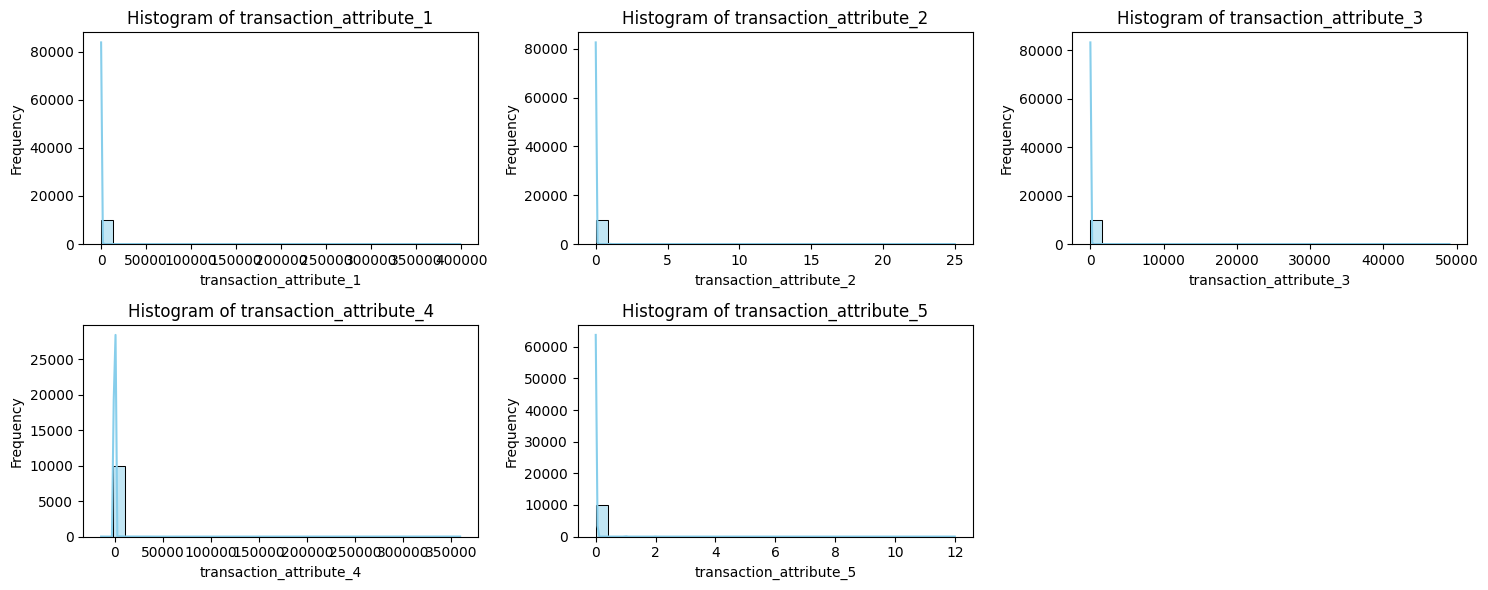

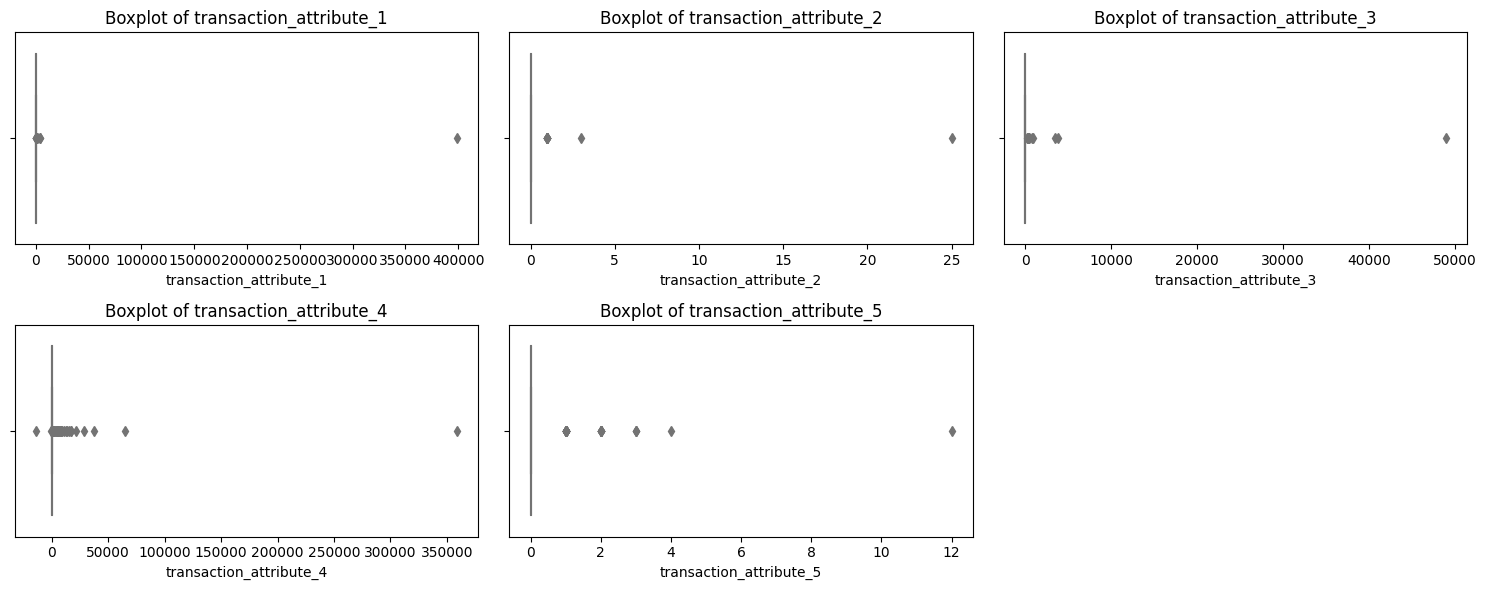

       transaction_attribute_1  transaction_attribute_2  \
count             10000.000000             10000.000000   
mean                 41.058679                 0.003800   
std                3989.721547                 0.253756   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              398936.791000                25.000000   

       transaction_attribute_3  transaction_attribute_4  \
count             10000.000000             10000.000000   
mean                  6.034300                67.651783   
std                 492.977027              3711.228686   
min                   0.000000            -14133.488280   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000

In [31]:

# Sampling the data for large datasets (e.g., 10,000 rows)
df_sample = train.sample(n=10000, random_state=42)

# List of numerical columns to perform univariate analysis
numerical_columns = train.columns[3:3+663].tolist() + train.columns[3+663+50:3+663+50+48].tolist()

# 1. Univariate Analysis for Numerical Columns (Histograms)

plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_columns[:5]):  # Limiting to first 5 for simplicity
    plt.subplot(2, 3, i+1)
    sns.histplot(df_sample[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Boxplots for Numerical Columns (Detecting outliers)

plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_columns[:5]):  # Limiting to first 5 for simplicity
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_sample[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# 4. Descriptive Statistics for Key Numerical Columns
# Display the first 5 numerical columns' basic stats
print(df_sample[numerical_columns[:5]].describe())


 Skewed Distributions:
The boxes and whiskers are highly compressed towards the lower end of the range, indicating that the distributions are heavily skewed to the right (positive skewness).
Most of the data points are concentrated near the lower range of each attribute.

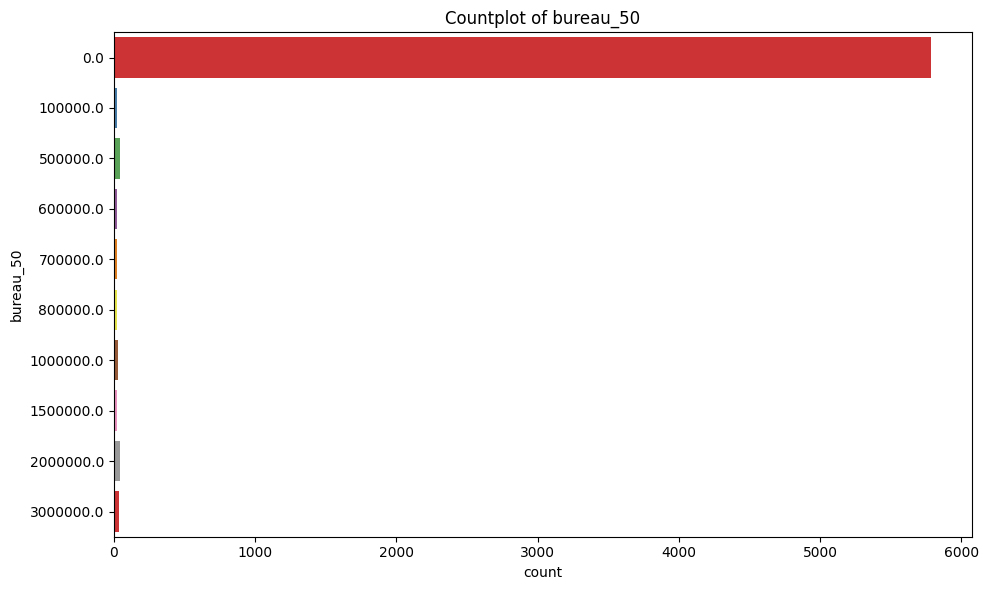

In [29]:
# Select the 'onus_attribute_1' column
onus_column = df_sample[onus_columns[0]]

# Plot the frequency distribution with a horizontal bar plot for better readability
plt.figure(figsize=(10, 6))  # Increase the figure size for more space
sns.countplot(y=onus_column_clean, palette='Set1')  # Use 'y' for horizontal bars

# Adjust the plot appearance for better readability
plt.title(f'Countplot of {onus_columns[0]}')
plt.xlabel('Frequency')
plt.ylabel(onus_columns[0])

# If there are too many categories, we can limit the top 10 most frequent
top_categories = onus_column_clean.value_counts().head(10).index
sns.countplot(y=onus_column_clean[onus_column_clean.isin(top_categories)], palette='Set1')

# Show the plot
plt.tight_layout()  # Automatically adjusts subplot params for a nicer layout
plt.show()


Highly Imbalanced Distribution:

The feature bureau_50 has a dominant value (likely 0.0) with an overwhelmingly higher count compared to other values.
Other values of bureau_50 appear to have very low frequencies, indicating that the dataset is heavily skewed toward this dominant value

In [ ]:
#  Bivariate Analysis (Two Variables)

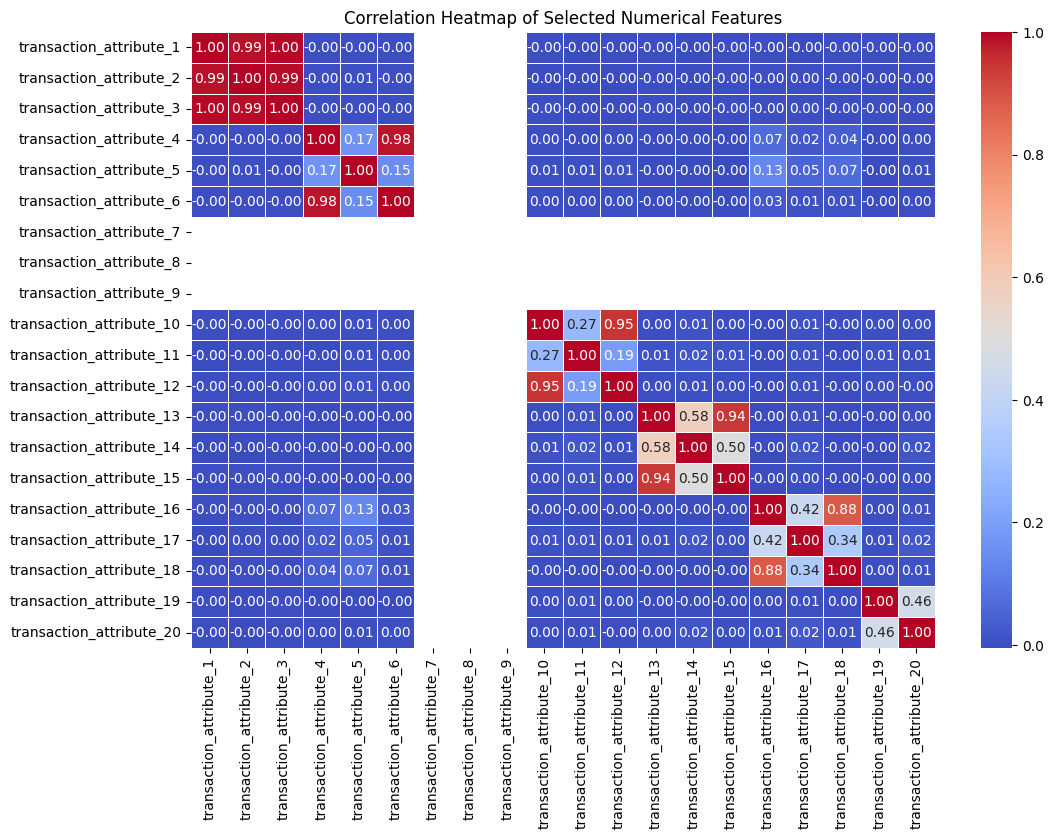

In [36]:
# Select a subset of relevant numerical columns (to reduce the size)
numerical_columns = df_sample.columns[3:3+663+50]  # From transaction_attribute_1 to bureau_enquiry_50

# Limit the correlation matrix to a smaller subset to improve performance (e.g., top 20 most important columns)
sample_columns = numerical_columns[:20]  # Select a smaller set of columns to display correlations

# Compute the correlation matrix for the subset
correlation_matrix = df_sample[sample_columns].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()


Strong Correlations Between Certain Attributes:

There is a high positive correlation among transaction_attribute_1, transaction_attribute_2, and transaction_attribute_3 (correlation values close to 1.00). This indicates redundancy and a strong linear relationship between these features.


Similarly, attributes such as transaction_attribute_10, transaction_attribute_13, transaction_attribute_14, and transaction_attribute_15 also exhibit strong correlations, particularly between attribute_13 and attribute_14 (0.94).


Potential Groups of Related Features:

Attributes like transaction_attribute_4 and transaction_attribute_6 show a strong correlation (0.98), suggesting they might measure similar aspects of the data.


A group involving transaction_attribute_17, transaction_attribute_18, and transaction_attribute_19 shows moderate to strong correlations (values between 0.42 and 0.88).


Sparse Correlation Elsewhere:

Many of the remaining features show low or negligible correlations (close to 0) with each other. These attributes might capture distinct, unrelated dimensions of the dataset.

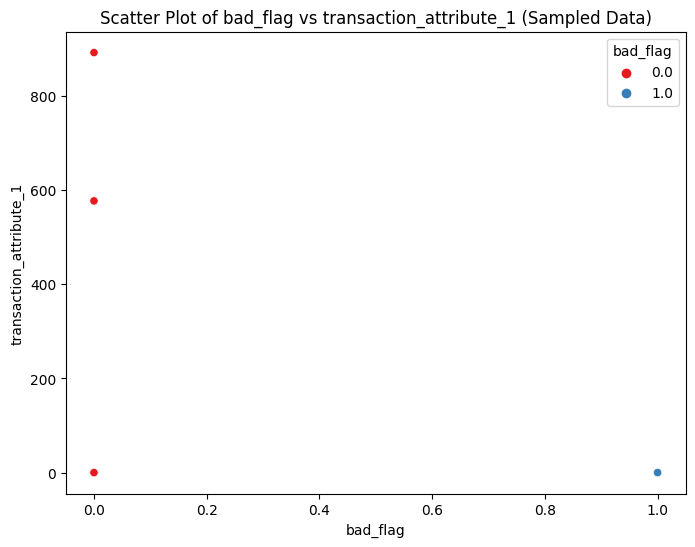

In [37]:
# Randomly sample 1000 rows (adjust this based on your system's memory and the dataset size)
sampled_df = df_sample.sample(n=1000, random_state=42)

# Plot the scatter plot between 'bad_flag' and 'transaction_attribute_1'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sampled_df['bad_flag'], y=sampled_df['transaction_attribute_1'], hue=sampled_df['bad_flag'], palette='Set1')
plt.title('Scatter Plot of bad_flag vs transaction_attribute_1 (Sampled Data)')
plt.xlabel('bad_flag')
plt.ylabel('transaction_attribute_1')
plt.show()


Instances with bad_flag = 1 are not only fewer in number but also seem to deviate from the patterns observed in non-flagged transactions

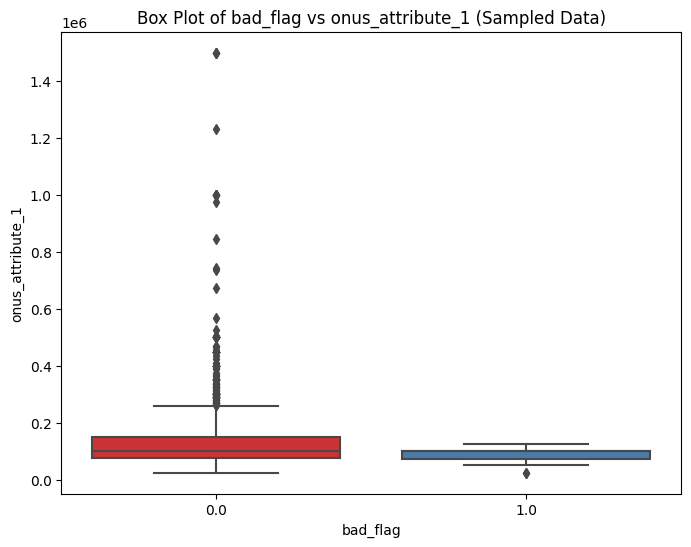

In [38]:
# Randomly sample 1000 rows for the box plot
sampled_df = df_sample.sample(n=1000, random_state=42)

# Box plot of 'bad_flag' vs 'onus_attribute_1'
plt.figure(figsize=(8, 6))
sns.boxplot(x=sampled_df['bad_flag'], y=sampled_df['onus_attribute_1'], palette='Set1')
plt.title('Box Plot of bad_flag vs onus_attribute_1 (Sampled Data)')
plt.xlabel('bad_flag')
plt.ylabel('onus_attribute_1')
plt.show()


Group Comparison:

onus_attribute_1 values are generally higher for bad_flag = 0 compared to bad_flag = 1.
The bad_flag = 1 group has a narrower distribution and lower median values for onus_attribute_1.

Separation:


There is a distinction between the distributions of onus_attribute_1 for the two groups, but overlap exists, indicating incomplete separation.
Predictive Indicator:

The differences in distributions suggest onus_attribute_1 may be a potential predictor for bad_flag.





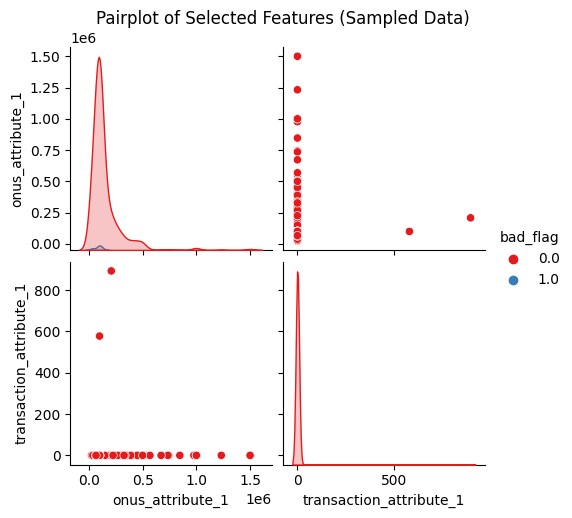

In [39]:
# Select a subset of columns and downsample the data
subset_columns = ['bad_flag', 'onus_attribute_1', 'transaction_attribute_1']
sampled_pairplot_df = df_sample[subset_columns].sample(n=1000, random_state=42)

# Plot pairplot
sns.pairplot(sampled_pairplot_df, hue='bad_flag', palette='Set1')
plt.suptitle('Pairplot of Selected Features (Sampled Data)', y=1.02)
plt.show()


The analysis suggests that bad_flag = 1 cases are strongly associated with outliers in the dataset, particularly in the features onus_attribute_1 and transaction_attribute_1. These anomalies might indicate fraudulent or problematic transactions. 

In [4]:
# Load datasets
dev_data = pd.read_csv('/kaggle/input/train-data/Dev_data_to_be_shared.csv')
val_data = pd.read_csv('/kaggle/input/datata/validation_data_to_be_shared.csv')

In [12]:
# Basic information about datasets
print("Development Data Shape:", dev_data.shape)
print("Validation Data Shape:", val_data.shape)

Development Data Shape: (96806, 1216)
Validation Data Shape: (41792, 1215)


In [13]:
dev_data.head()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 1216 entries, account_number to onus_attribute_48
dtypes: float64(1189), int64(27)
memory usage: 898.1 MB


In [5]:
dev_data['bad_flag'].value_counts(normalize=True)

bad_flag
0    0.985827
1    0.014173
Name: proportion, dtype: float64

In [6]:
# Drop columns with 100% missing values
dev_data_cleaned = dev_data.dropna(axis=1, how='all')

# Columns with missing values > 90%
high_missing_cols = dev_data_cleaned.isnull().mean() > 0.9
high_missing_cols = dev_data_cleaned.columns[high_missing_cols]

# Drop high missing columns (after evaluation of importance)
dev_data_cleaned = dev_data_cleaned.drop(columns=high_missing_cols)

# Impute remaining missing values (if necessary)
from sklearn.impute import SimpleImputer

# For numerical columns, use median imputation
imputer = SimpleImputer(strategy='median')
dev_data_cleaned[dev_data_cleaned.select_dtypes(include=['float64', 'int64']).columns] = \
    imputer.fit_transform(dev_data_cleaned.select_dtypes(include=['float64', 'int64']))

# Check if missing values are handled
missing_summary_after = dev_data_cleaned.isnull().sum()
print(missing_summary_after[missing_summary_after > 0])  # Display remaining missing values if any

Series([], dtype: int64)


In [8]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(dev_data_cleaned.select_dtypes(include=['float64', 'int64']))

# Find outliers (values with Z-score > 3 or < -3)
outliers = (abs(z_scores) > 3)

# Get the indices of the outliers
outlier_indices = dev_data[abs(z_scores) > 3].index

# Print outliers' count
print(f"Number of outliers: {len(outlier_indices)}")

Number of outliers: 96806


In [9]:
'''import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for numerical columns
numerical_cols = dev_data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=dev_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()'''

"import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Create boxplots for numerical columns\nnumerical_cols = dev_data.select_dtypes(include=['float64', 'int64']).columns\n\nfor col in numerical_cols:\n    plt.figure(figsize=(8,6))\n    sns.boxplot(x=dev_data[col])\n    plt.title(f'Boxplot of {col}')\n    plt.show()"

In [10]:
# List of numerical columns (already identified)
numerical_cols = dev_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Apply percentile-based capping (1st and 99th percentiles)
for col in numerical_cols:
    lower_limit = dev_data_cleaned[col].quantile(0.01)  # 1st percentile
    upper_limit = dev_data_cleaned[col].quantile(0.99)  # 99th percentile
    dev_data_cleaned[col] = dev_data_cleaned[col].clip(lower=lower_limit, upper=upper_limit)

We cap the outliers by limiting values to the 1st and 99th percentiles for each numerical column. This ensures we keep the valid data but prevent extreme values from distorting the analysis.

In [11]:
df = dev_data_cleaned

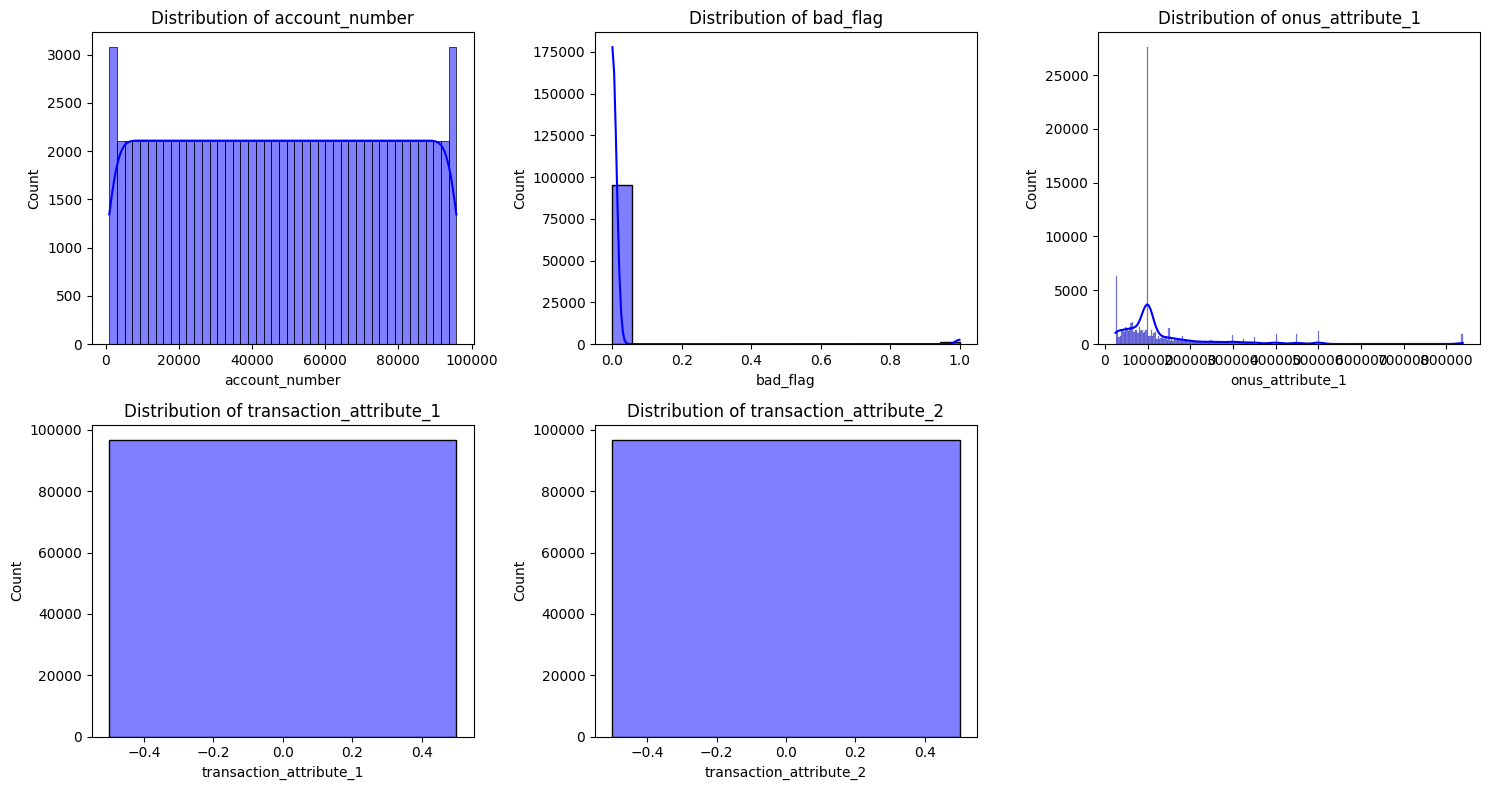

In [23]:
# Univariate analysis
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols[:5], 1):  # Adjust [:5] to display more variables if needed
    plt.subplot(2, 3, i)
    sns.histplot(dev_data_cleaned[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

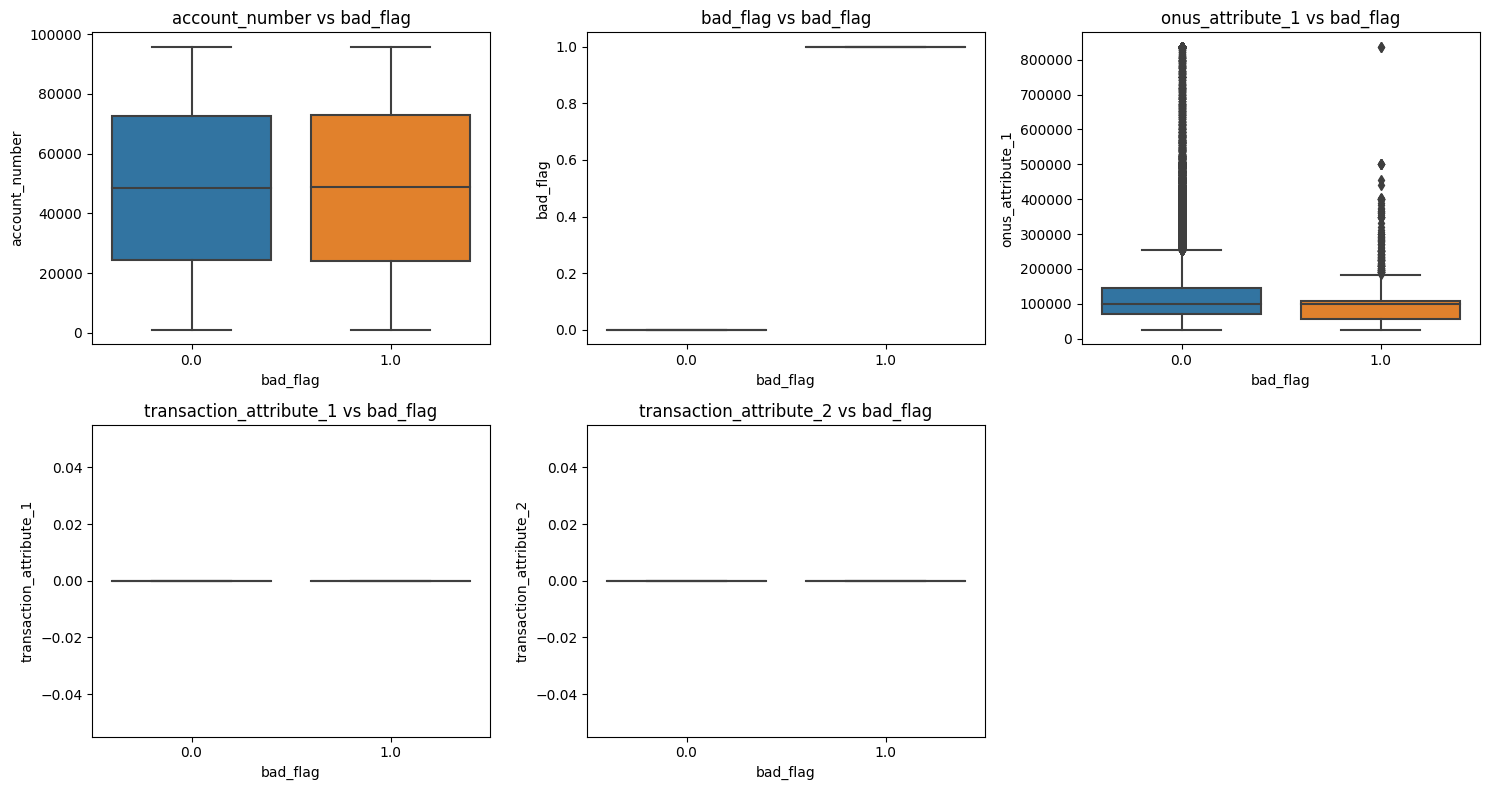

In [24]:
# Bivariate analysis with bad_flag
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols[:5], 1):  # Adjust [:5] as needed
    plt.subplot(2, 3, i)
    sns.boxplot(x=dev_data_cleaned['bad_flag'], y=dev_data_cleaned[col])
    plt.title(f'{col} vs bad_flag')
plt.tight_layout()
plt.show()

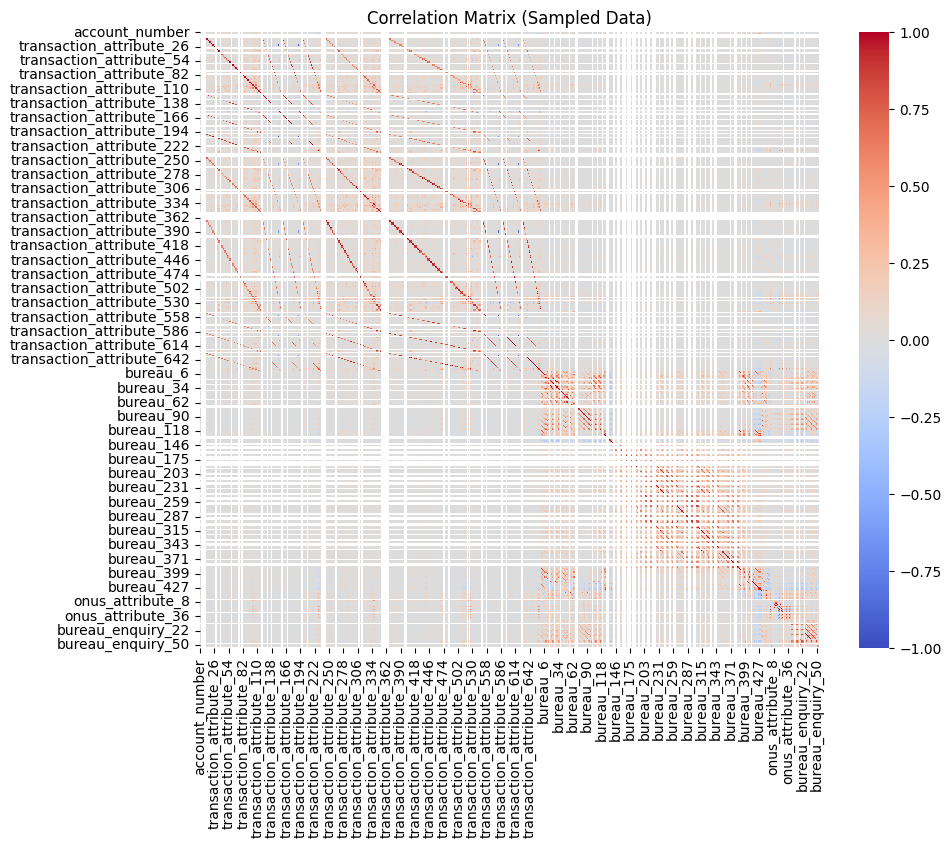

In [25]:
# Option 1: Random Sampling for Correlation
sampled_data = dev_data_cleaned.sample(n=10000, random_state=42)  # Adjust sample size based on available memory
correlation_matrix_sample = sampled_data.corr()

# Plot the sampled correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sample, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix (Sampled Data)")
plt.show()

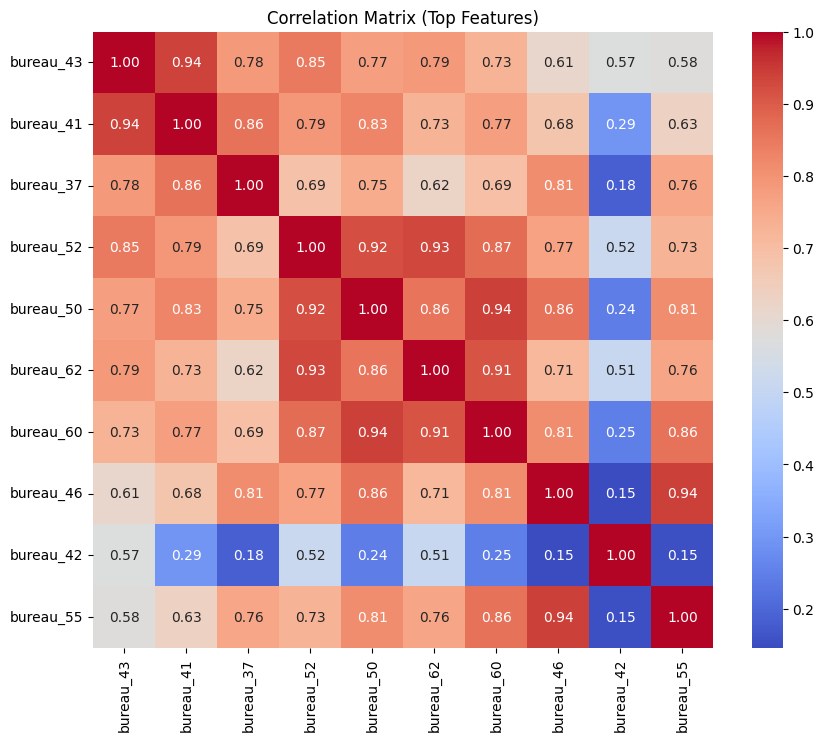

In [26]:

# Option 2: Selective Correlation Analysis (e.g., top 10 numerical columns by variance)
top_numerical_cols = dev_data_cleaned[numerical_cols].var().nlargest(10).index
correlation_matrix_selected = dev_data_cleaned[top_numerical_cols].corr()

# Plot selective correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix (Top Features)")
plt.show()


In [27]:
# Option 3: Iterative Pairwise Correlation (Efficient for Large Data)
correlations = {}
for col in numerical_cols[:10]:  # Limit the number of columns analyzed
    correlations[col] = dev_data_cleaned[col].corr(dev_data_cleaned['bad_flag'])

# Display the top correlations with the target variable
correlation_with_target = pd.Series(correlations).sort_values(ascending=False)
print("Top Correlations with 'bad_flag':")
print(correlation_with_target)

Top Correlations with 'bad_flag':
bad_flag                   1.000000
account_number            -0.000912
onus_attribute_1          -0.032531
transaction_attribute_1         NaN
transaction_attribute_2         NaN
transaction_attribute_3         NaN
transaction_attribute_4         NaN
transaction_attribute_5         NaN
transaction_attribute_6         NaN
transaction_attribute_7         NaN
dtype: float64


In [28]:
'''# Univariate analysis for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(dev_data_cleaned[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

# Univariate analysis for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dev_data_cleaned, x=col, order=dev_data_cleaned[col].value_counts().index, palette='viridis')
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()'''


'# Univariate analysis for numerical features\nfor col in numerical_cols:\n    plt.figure(figsize=(8, 4))\n    sns.histplot(dev_data_cleaned[col], kde=True, bins=30, color=\'blue\')\n    plt.title(f"Distribution of {col}")\n    plt.show()\n\n# Univariate analysis for categorical features\nfor col in categorical_cols:\n    plt.figure(figsize=(8, 4))\n    sns.countplot(data=dev_data_cleaned, x=col, order=dev_data_cleaned[col].value_counts().index, palette=\'viridis\')\n    plt.title(f"Count of {col}")\n    plt.xticks(rotation=45)\n    plt.show()'

Balanced class distribution:
 bad_flag
0.0    95434
1.0    95434
Name: count, dtype: int64


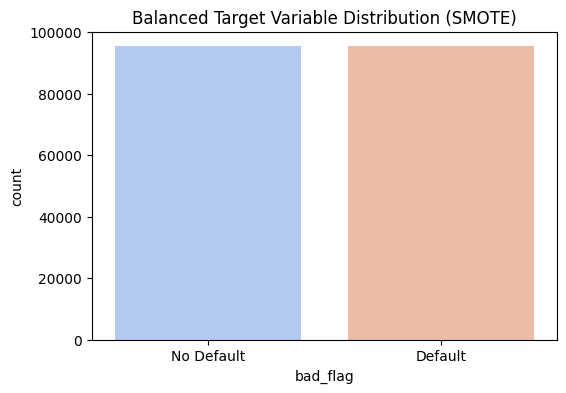

In [12]:
from imblearn.over_sampling import SMOTE

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X, y = dev_data_cleaned.drop(columns=['bad_flag']), dev_data_cleaned['bad_flag']
X_res, y_res = smote.fit_resample(X, y)

# Balanced class distribution
print("Balanced class distribution:\n", y_res.value_counts())

# Visualize the balanced class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_res, palette='coolwarm')
plt.title("Balanced Target Variable Distribution (SMOTE)")
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

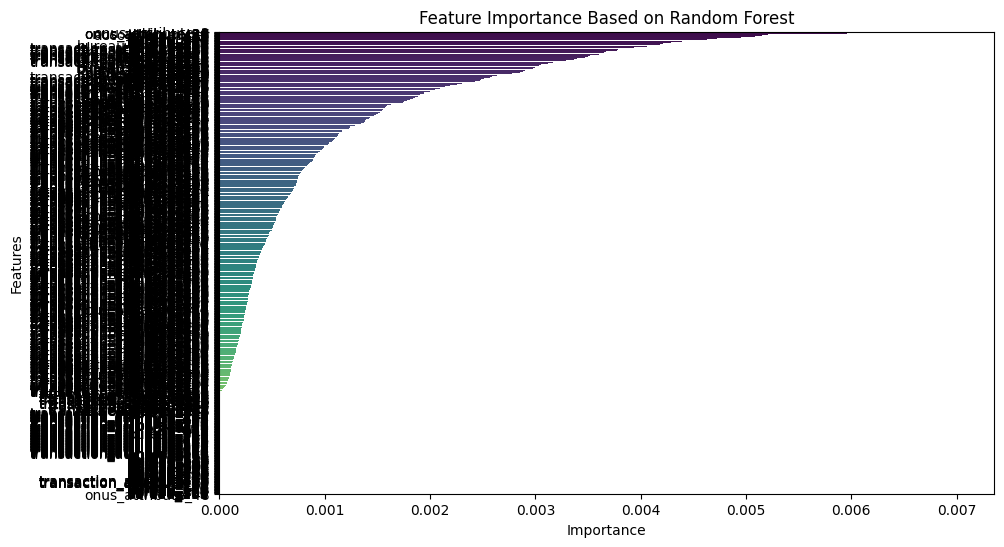

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Fit a Random Forest Classifier to assess feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance Based on Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize Logistic Regression
logreg_model = LogisticRegression(random_state=42, class_weight='balanced')

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Evaluation")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nROC-AUC Score:", roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1]))

Logistic Regression Evaluation
Confusion Matrix:
 [[12977  6060]
 [ 4982 14155]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.68      0.70     19037
         1.0       0.70      0.74      0.72     19137

    accuracy                           0.71     38174
   macro avg       0.71      0.71      0.71     38174
weighted avg       0.71      0.71      0.71     38174


ROC-AUC Score: 0.769875169507957


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Evaluation")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

Random Forest Evaluation
Confusion Matrix:
 [[19035     2]
 [  267 18870]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19037
         1.0       1.00      0.99      0.99     19137

    accuracy                           0.99     38174
   macro avg       0.99      0.99      0.99     38174
weighted avg       0.99      0.99      0.99     38174


ROC-AUC Score: 0.9992236071751089


In [16]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]))

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Evaluation")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

XGBoost Evaluation
Confusion Matrix:
 [[19031     6]
 [  280 18857]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19037
         1.0       1.00      0.99      0.99     19137

    accuracy                           0.99     38174
   macro avg       0.99      0.99      0.99     38174
weighted avg       0.99      0.99      0.99     38174


ROC-AUC Score: 0.9976890504526505


In [17]:
dev_data_cleaned.columns

Index(['account_number', 'bad_flag', 'onus_attribute_1',
       'transaction_attribute_1', 'transaction_attribute_2',
       'transaction_attribute_3', 'transaction_attribute_4',
       'transaction_attribute_5', 'transaction_attribute_6',
       'transaction_attribute_7',
       ...
       'bureau_enquiry_47', 'bureau_enquiry_48', 'bureau_enquiry_49',
       'bureau_enquiry_50', 'onus_attribute_43', 'onus_attribute_44',
       'onus_attribute_45', 'onus_attribute_46', 'onus_attribute_47',
       'onus_attribute_48'],
      dtype='object', length=1211)

In [18]:
val_data.columns

Index(['account_number', 'onus_attribute_1', 'transaction_attribute_1',
       'transaction_attribute_2', 'transaction_attribute_3',
       'transaction_attribute_4', 'transaction_attribute_5',
       'transaction_attribute_6', 'transaction_attribute_7',
       'transaction_attribute_8',
       ...
       'bureau_enquiry_47', 'bureau_enquiry_48', 'bureau_enquiry_49',
       'bureau_enquiry_50', 'onus_attribute_43', 'onus_attribute_44',
       'onus_attribute_45', 'onus_attribute_46', 'onus_attribute_47',
       'onus_attribute_48'],
      dtype='object', length=1215)

In [19]:
# Exclude 'account_number' and 'bad_flag' (target) from training features
X_train_features = [col for col in dev_data_cleaned.columns if col not in ['account_number', 'bad_flag']]

# Prepare training and validation data
X_train = dev_data_cleaned[X_train_features]
y_train = dev_data_cleaned['bad_flag']
X_val = val_data[X_train_features]  # Align validation features with training features

from sklearn.impute import SimpleImputer

# Initialize the imputer (fill NaNs with the mean of each column)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data (ensure consistent preprocessing)
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Train the model on imputed data
rf_model.fit(X_train_imputed, y_train)

# Predict probabilities for validation data
val_data['predicted_probability'] = rf_model.predict_proba(X_val_imputed)[:, 1]

# Create submission file
submission = val_data[['account_number', 'predicted_probability']]
submission.to_csv("credit_card_predictions.csv", index=False)

print("Predictions saved to 'credit_card_predictions.csv'")

Predictions saved to 'credit_card_predictions.csv'


The bad_flag is our target variable, with 98.58% of values being 0 (non-defaulters), indicating a significant class imbalance.

- *Model Selection:*

Algorithms like Logistic Regression, Random Forest, XGBoost, etc., can be used, but they may tend to predict the majority class (non-defaulters) due to the imbalance.
Consider using models that handle class imbalance better, such as balanced random forests or ensemble methods with class weighting.

- *Resampling Techniques:*

    - *Oversampling:* Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can generate synthetic samples for the minority class (defaulters) to balance the class distribution.
    - *Undersampling:* You could down-sample the majority class, though this can result in loss of information, especially when you have a large dataset.

- *Class Weights:*

During model training, most algorithms like Logistic Regression, Random Forest, and XGBoost offer the option to use class weights. Assigning a higher weight to the minority class (defaulters) ensures that the model pays more attention to them.
This can help the model better predict the minority class without significant loss of predictive accuracy on the majority class.

- *Evaluation Metrics:*

Standard metrics like accuracy are not sufficient for imbalanced data, as predicting the majority class (0 in this case) will still result in high accuracy.
Focus on metrics such as Precision, Recall, F1-Score, ROC-AUC, and PR-AUC (Precision-Recall AUC) to better assess model performance.
Confusion Matrix: Analyzing the confusion matrix will also help you understand how well the model is detecting defaulters (minority class) vs. non-defaulters (majority class).

- *Threshold Tuning:*

With highly imbalanced data, the default decision threshold (usually 0.5) may not work well. You can adjust the decision threshold to maximize Recall (catching more defaulters) or F1-Score, depending on your business needs.
A custom threshold based on the probability output of your model can help improve the detection of the minority class.

- *Cost-sensitive Learning:*

If the cost of misclassifying the minority class is high (i.e., incorrectly classifying defaulters), you can implement cost-sensitive learning, where the penalty for misclassifying the minority class is higher than for the majority class.